# Static Visualization

In [ ]:
# Check out viz.yml for package installation

# Basic data processing
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn
import plotnine
import ipyvizzu
import panel
import bokeh

## Load Data

In [2]:
# load anscombe data from seaborn
# Anscombe's quartet are four nearly identical sets of descriptive statistics that have very different distributions
anscombe = seaborn.load_dataset("anscombe")

## MatPlotLib  
[matplotlib tutorial](https://matplotlib.org/stable/tutorials/index.html)  
[matplotlib cheatsheets](https://matplotlib.org/cheatsheets/)  

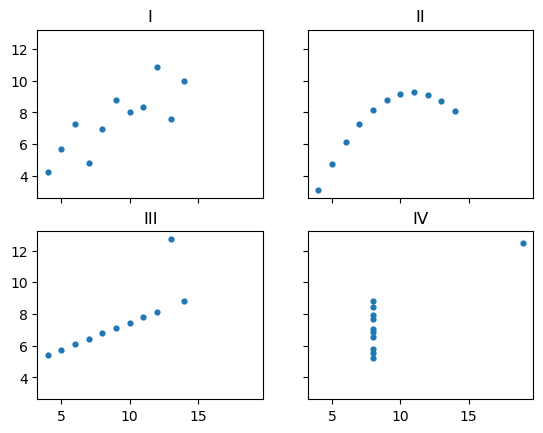

In [3]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for (label,group), ax in zip(anscombe.groupby('dataset'), axes.flat):
  ax.scatter(group['x'], group['y'], s=12)
  ax.set_title(label)

# Save/export figure
plt.savefig("matplotlib_anscombe.svg", dpi=400)  
plt.show()


## Plotnine  

Python's version of ggplot - syntax is essentially identical  
Documentation is poor so utilize ggplot documentation  

[ggplot tutorial](http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html)  
[plotnine examples](https://plotnine.readthedocs.io/en/stable/gallery.html#)

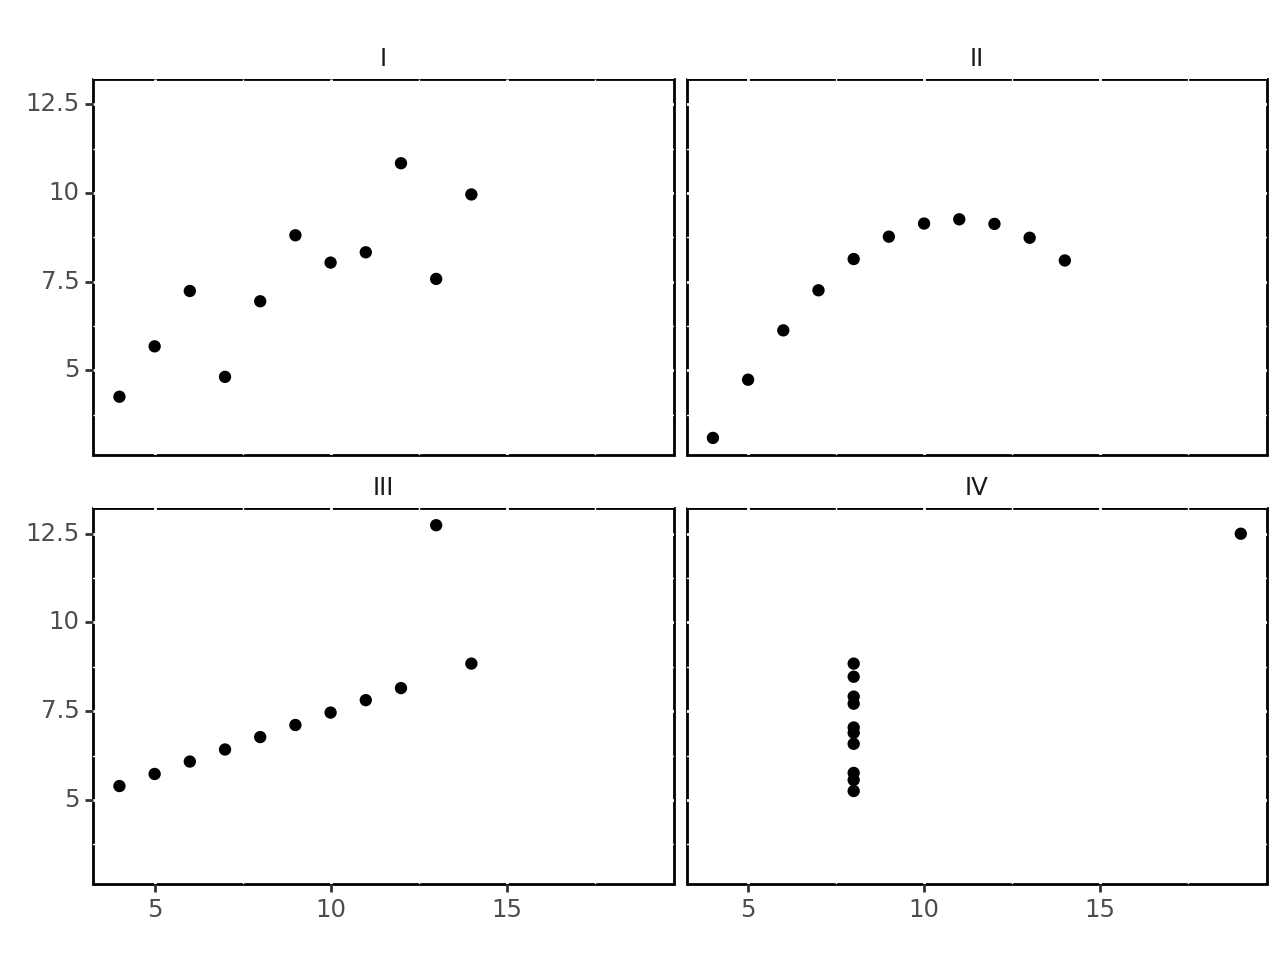

In [4]:
(
    plotnine.ggplot(anscombe, plotnine.aes(x='x', y='y'))
    + plotnine.facet_wrap('dataset', ncol=2)
    + plotnine.geom_point()
    + plotnine.labs(x = "", y="")
    + plotnine.theme(
        panel_background=plotnine.element_rect(fill="white"),
        strip_background=plotnine.element_rect(fill="white"),
        panel_border=plotnine.element_rect(color = "black", size = 1)
        )
).draw()

### Alternatively, utilize any of plotnine's built in themes (plotnine.theme)

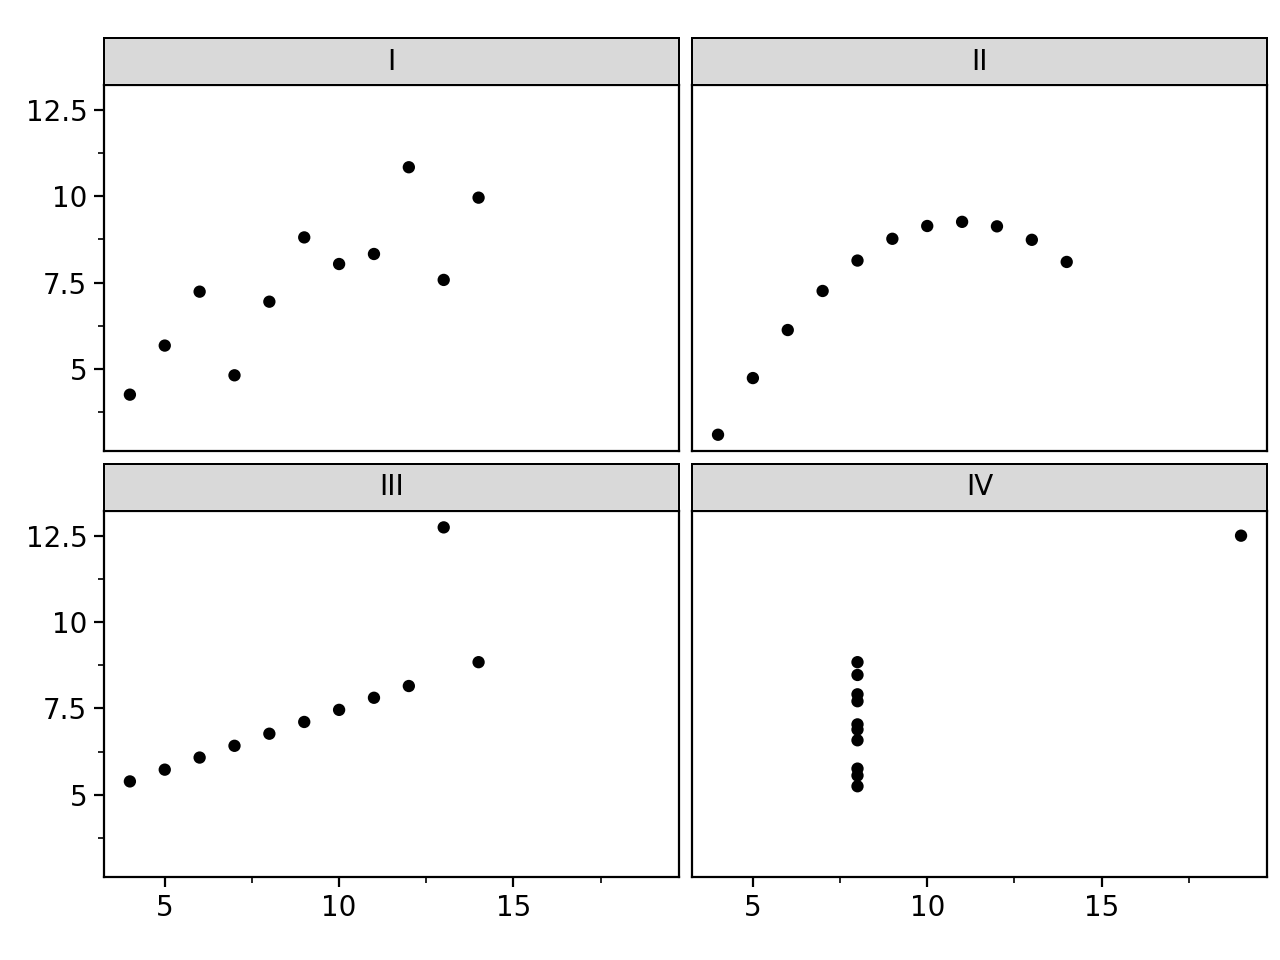

In [5]:
(
    plotnine.ggplot(anscombe, plotnine.aes(x='x', y='y'))
    + plotnine.facet_wrap('dataset', ncol=2)
    + plotnine.geom_point()
    + plotnine.labs(x = "", y="")
    + plotnine.theme_matplotlib()
).draw()

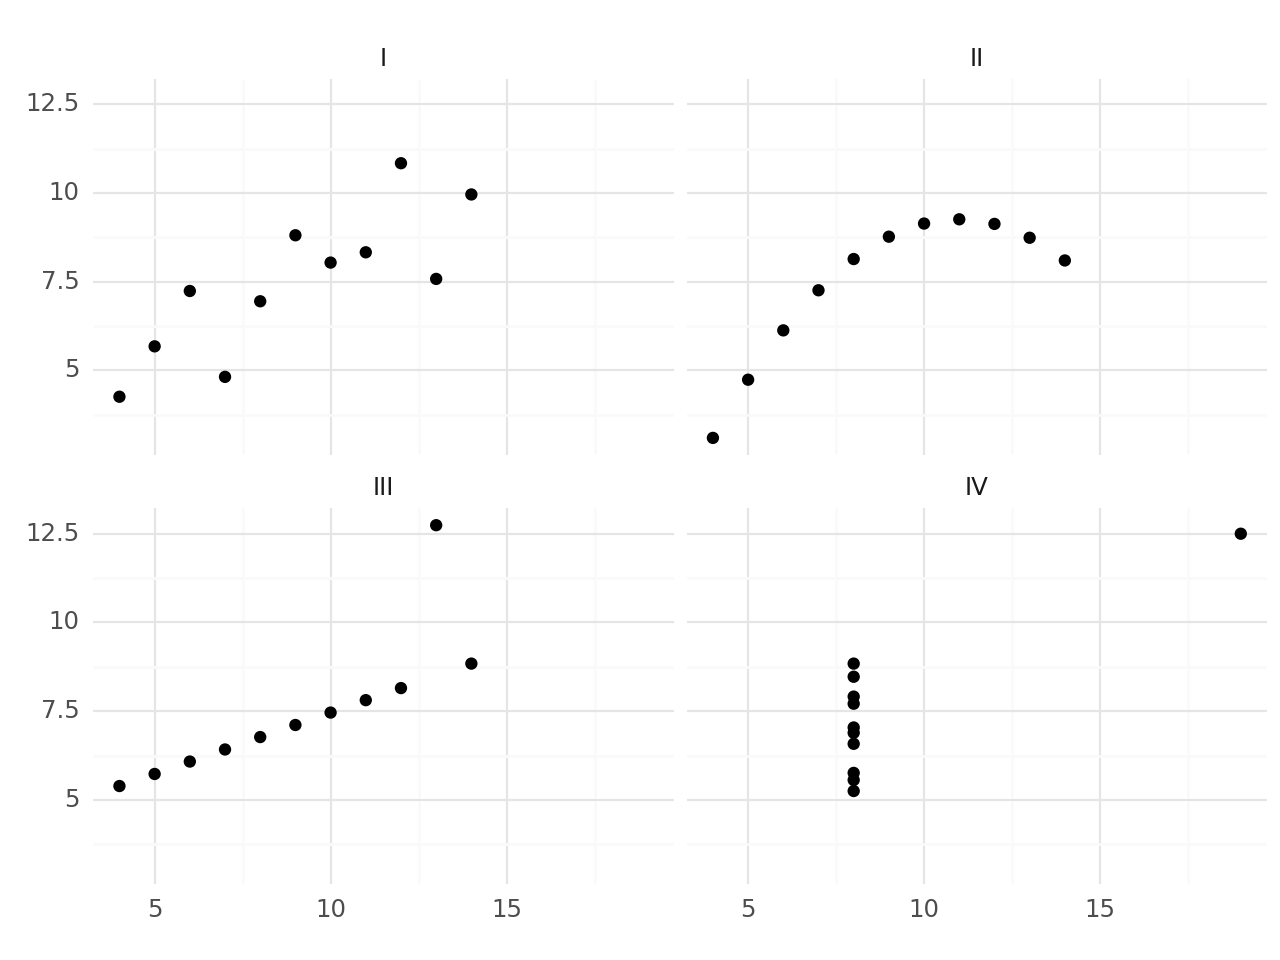

In [6]:
(
    plotnine.ggplot(anscombe, plotnine.aes(x='x', y='y'))
    + plotnine.facet_wrap('dataset', ncol=2)
    + plotnine.geom_point()
    + plotnine.labs(x = "", y="")
    + plotnine.theme_minimal()
).draw()

## Seaborn

[Seaborn user guide and tutorials](https://seaborn.pydata.org/tutorial.html)  
[Seaborn examples](https://seaborn.pydata.org/examples/index.html)  

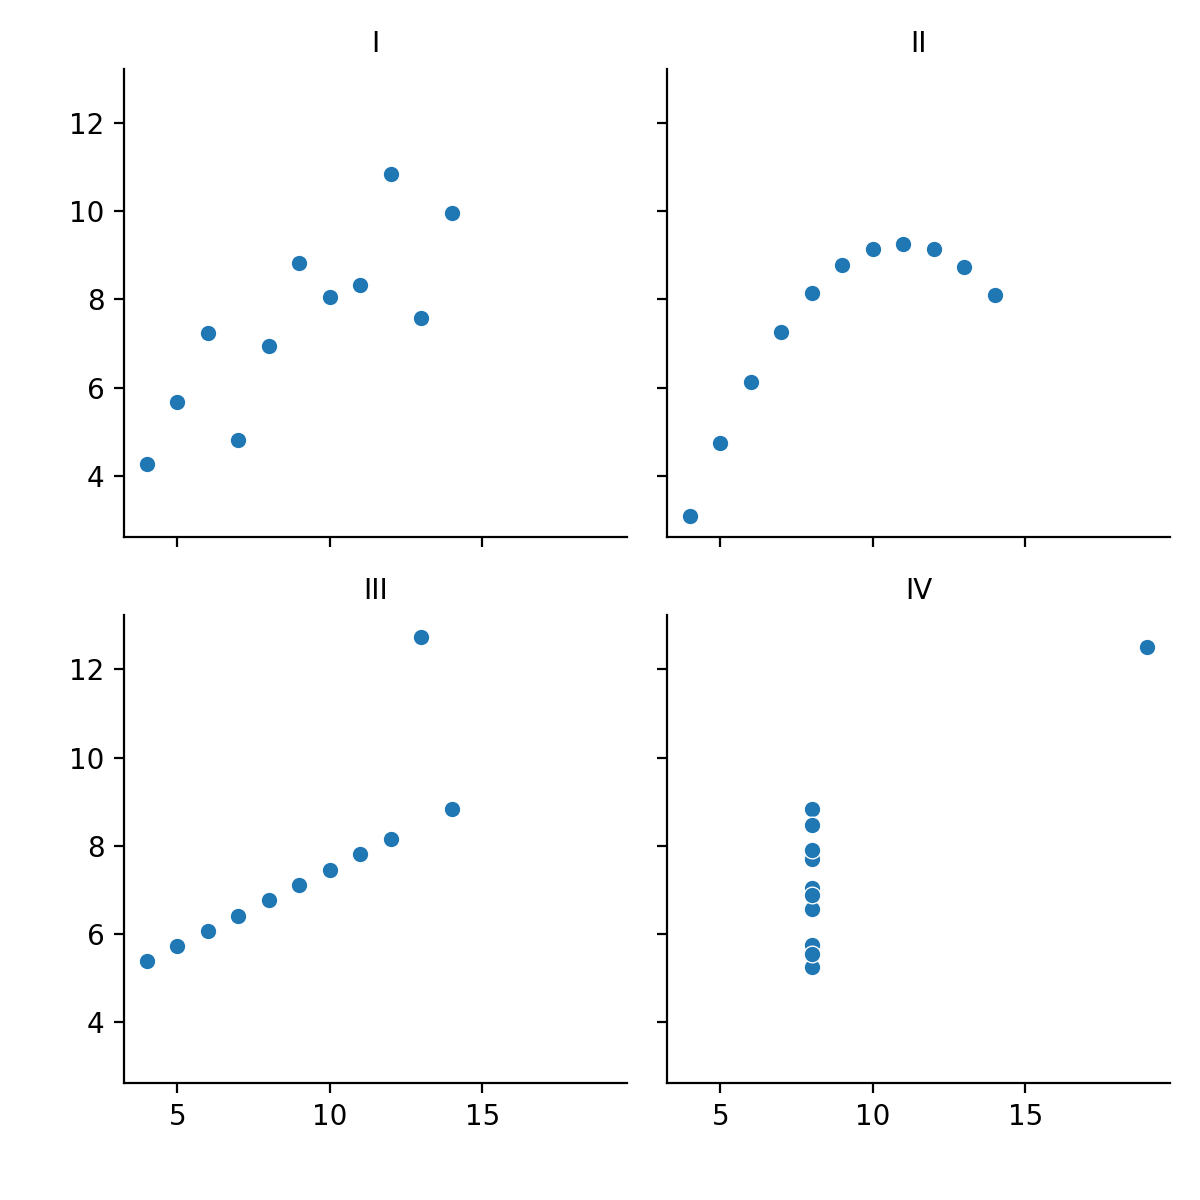

In [7]:
g = seaborn.FacetGrid(anscombe, col="dataset", col_wrap=2)
g.map(seaborn.scatterplot, 'x', 'y')
g.set_axis_labels(x_var=" ", y_var=" ")
g.set_titles("{col_name}")

#### Seaborn has some nice built in functions such as [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) which plots data and regression across a FacetGrid

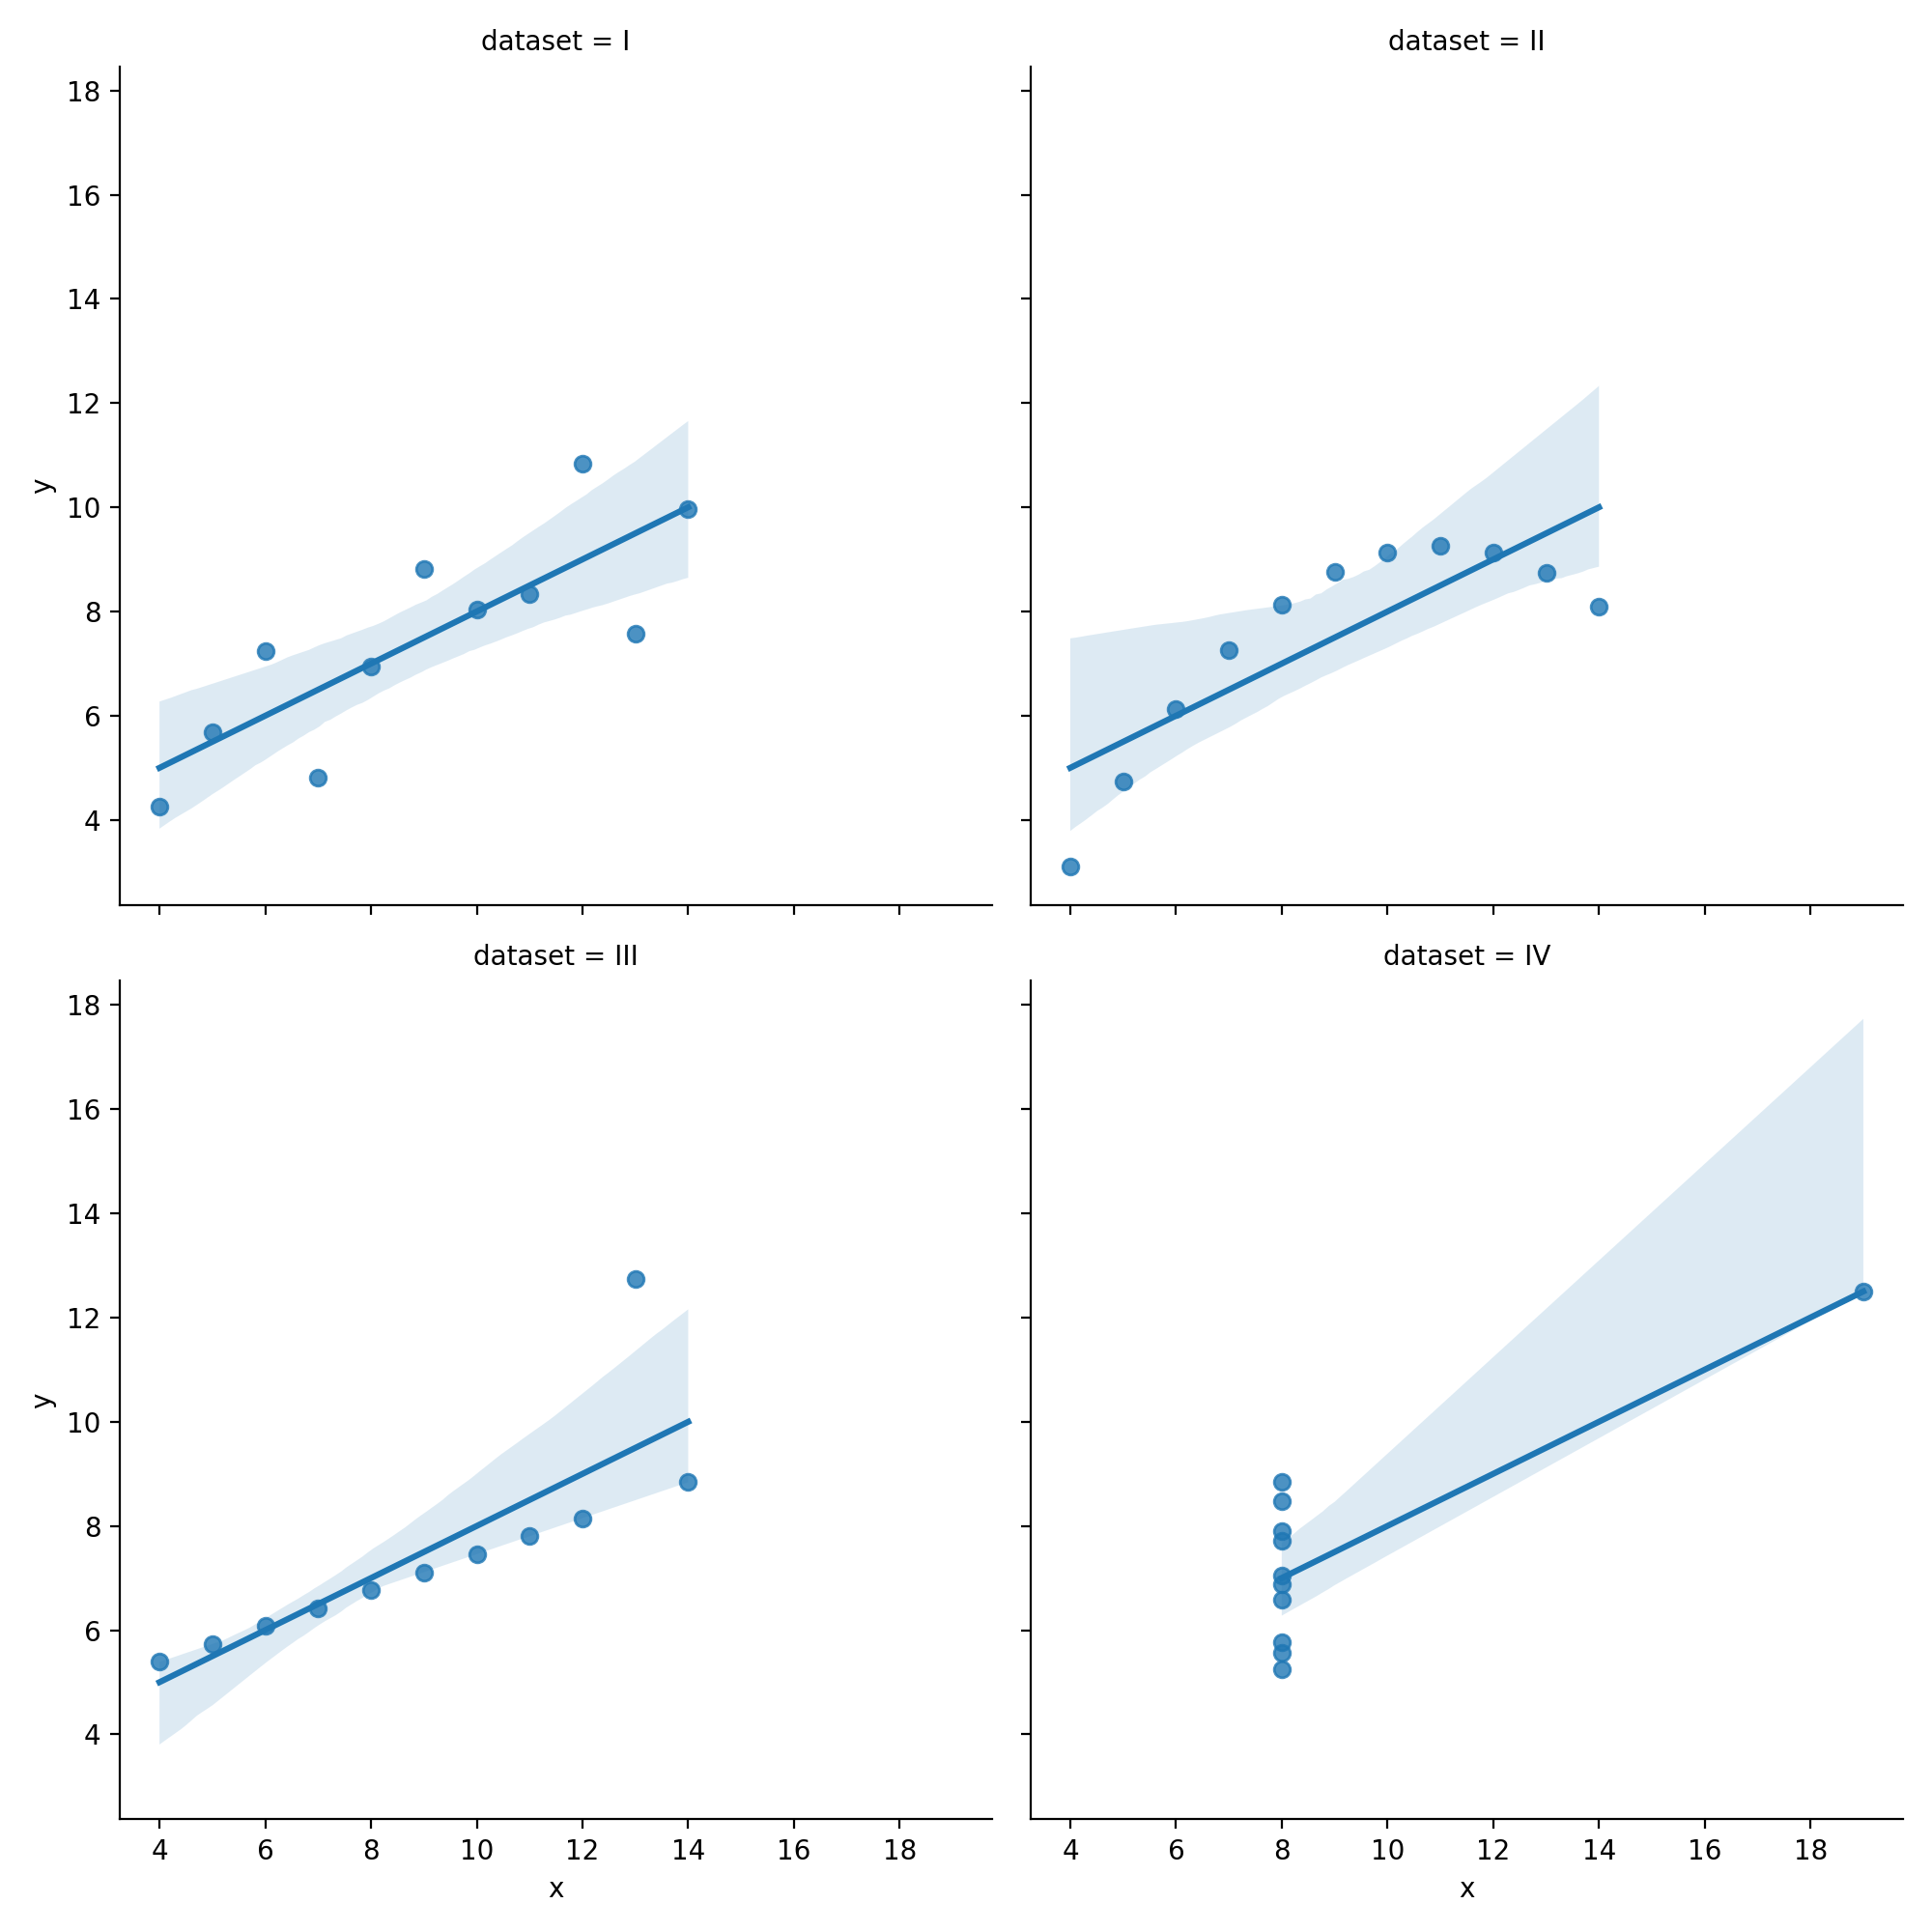

In [8]:
seaborn.lmplot(anscombe, x='x', y='y', col = 'dataset', col_wrap=2)
plt.show()

# Interactive Visualization

A couple of nice Python packages that allow for interactive visualizations through JupyterNotebooks or html

## Bokeh

[Bokeh tutorial](https://docs.bokeh.org/en/latest/docs/first_steps.html#first-steps) and [examples](https://docs.bokeh.org/en/latest/docs/gallery.html#gallery)  

In [9]:
# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

# Output to file
bokeh.io.output_file('anscombe_interact.html',
            title='Anscombe Interactive Example')
# Or output to Notebook (or both!)
bokeh.io.output_notebook()

# Store the data in a ColumnDataSource
anscombe_cds = ColumnDataSource(anscombe)

# Specify the selection tools to be made available
select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']

# Create the figure
fig = figure(x_axis_label='x lab',
             y_axis_label='y lab',
             title='Anscombe Interactive Example',
             toolbar_location='below',
             tools=select_tools)

# Format the y-axis tick labels as percentages
fig.yaxis[0].formatter = NumeralTickFormatter(format='00.0%')

# Add square representing each player
fig.square(x='x',
           y='y',
           source=anscombe_cds,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)

# Visualize
show(fig)

Loading BokehJS ...

In [10]:
# Format the tooltip
tooltips = [
            ('X axis','@x'),
            ('Y axis', '@y'),
           ]

# Configure a renderer to be used upon hover
hover_glyph = fig.circle(x='x', y='y', source=anscombe_cds,
                         size=15, alpha=0,
                         hover_fill_color='black', hover_alpha=0.5)

# Add the HoverTool to the figure
fig.add_tools(HoverTool(tooltips=tooltips, renderers=[hover_glyph]))

# Visualize
show(fig)

## Vizzu

[ipyvizzu tutorial](https://ipyvizzu.vizzuhq.com/latest/tutorial/) and [examples](https://ipyvizzu.vizzuhq.com/latest/examples/analytical_operations/)  

In [13]:
import pandas as pd
from ipyvizzu import Chart, Data, Config, Style
 
data = Data()
data.add_df(anscombe)

# In order to get this chart to display correctly we need to create a "dummy" column
# that is a unique value for each point per dataset (I, II, III, IV)
anscombe["year"] = list(range(1,12))*4
anscombe["year"] = anscombe["year"].astype(str)

chart = Chart()
chart.animate(data)
chart.animate(
    Config(
        {
            "channels": {
                "x": ["x", "dataset"],
                "y": "y",
                "noop" : "year",
                "color": "dataset",
            },
            "geometry": "circle",
            "split": True,
            "orientation": "vertical",
        }
    )
)
 
chart.animate(
    Config({"channels": {"x": "x"}, "split": False})
)
 
chart.feature("tooltip", True)

[How to export vizzu animation to gif](https://blog.vizzuhq.com/javascript-library-tutorial/2023/04/07/Vizzu-GIF-export.html)

[Check out ipyvizzu-story for interactive data animations](https://ipyvizzu-story.vizzuhq.com/latest/)